## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [73]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [74]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [75]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [76]:
df['user_id'].nunique()

290584

In [77]:
len(df[df['converted']==1])

35237

In [78]:
len(df.loc[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')])

1928

In [79]:
len(df.loc[(df['landing_page'] != 'new_page') & (df['group'] == 'treatment')])

1965

d. The proportion of users converted.

In [80]:
#df['converted'].mean()
(len(df[df['converted'] == 1]) / df.shape[0]) *100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [81]:
x = len(df.loc[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')])
y = len(df.loc[(df['landing_page'] != 'new_page') & (df['group'] == 'treatment')])
print(x+y)

3893


In [82]:
x = df.query('group == "treatment" & landing_page == "old_page"')['user_id'].count()
y = df.query('group == "control" & landing_page == "new_page"')['user_id'].count()
The_number_of_times = x + y 
print(The_number_of_times)

3893


f. Do any of the rows have missing values?

In [83]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [85]:
x = df.query('group == "control" & landing_page == "old_page"')
y = df.query('group == "treatment" & landing_page == "new_page"')
df2 = y.append(x)
df2.head(10)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


In [86]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [87]:
df2['user_id'].nunique()

290584

In [88]:
df2['user_id'].duplicated().sum()

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [89]:
x = df2.loc[(df2['user_id'].duplicated())]
x

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [90]:
df2.loc[(df2['user_id'].duplicated())]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [91]:
df2.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [92]:
len(df2.loc[df2['converted']==1])/ df2.shape[0]

0.11959708724499628

In [93]:
df2.query('converted == 1')['converted'].count() / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

p(control|converted)=P(control & converted)/P(control)

In [94]:
df2.query("group == 'control' and converted == '1' ").shape[0]/df.shape[0]

0.0593898355734554

In [95]:
df2.query("group == 'control'").shape[0]/df.shape[0]

0.4933271755445229

In [96]:
cont_converted_prob = 0.0593898355734554 / 0.4933271755445229
cont_converted_prob

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [97]:
df2.query("group == 'treatment' and converted == '1' ").shape[0]/df.shape[0]

0.05862577170450764

In [98]:
df2.query("group == 'treatment'").shape[0]/df.shape[0]

0.4934494257635545

In [99]:
treat_converted_prob = 0.05862577170450764 / 0.4934494257635545
treat_converted_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [100]:
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

- The rate of conversion of the control group is higher than the rate of conversion of treatment group (the new page) with a small difference of 0.2%.

- Probability that one recieved a new page is 0.5, this means that there is no difference in probabilities of receiving the old or new page, both have same opportunity

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: P_old = P_new 

H1: P_new > P_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [101]:
mask = (df2["group"] == "control")
conversions_control = df2["converted"][mask].sum()
total_users_control = df2["converted"][mask].count()
conversions_control

17489

In [108]:
df2["converted"][mask].sum()

17489

In [109]:
df2["converted"][mask].count()

145274

In [118]:
(df2.loc[(df2['group']=='control') & (df2['converted']==1)])

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
28,913579,2017-01-24 09:11:39.164256,control,old_page,1
36,831737,2017-01-11 21:18:20.911015,control,old_page,1
43,862225,2017-01-08 14:49:37.335432,control,old_page,1
...,...,...,...,...,...
294383,728029,2017-01-11 11:17:05.291493,control,old_page,1
294385,850065,2017-01-17 11:57:18.569907,control,old_page,1
294405,712217,2017-01-11 10:34:30.176801,control,old_page,1
294420,795742,2017-01-09 01:06:58.299207,control,old_page,1


In [119]:
df2.loc[(df2['group']=='control')]

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [114]:
df2.shape

(290584, 5)

In [40]:
p_new = df2['converted'].mean()
print(p_new)

0.11959667567149027


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [41]:
p_old = p_new
p_old = df2['converted'].mean()
print(p_old)

0.11959667567149027


c. What is $n_{new}$, the number of individuals in the treatment group?

In [42]:
n_new = len(df2[df2['group'] == 'treatment'])
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [43]:
n_old = len(df2[df2['group'] == 'control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [50]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [51]:
old_page_converted = np.random.binomial(1,p_old,n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [52]:
new_page_converted.mean() - old_page_converted.mean()

0.001738413836344141

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [64]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([9.000e+00, 9.800e+01, 5.890e+02, 1.876e+03, 3.210e+03, 2.725e+03,
        1.200e+03, 2.610e+02, 3.000e+01, 2.000e+00]),
 array([-0.00484842, -0.00383047, -0.00281252, -0.00179456, -0.00077661,
         0.00024134,  0.00125929,  0.00227724,  0.00329519,  0.00431314,
         0.00533109]),
 <BarContainer object of 10 artists>)

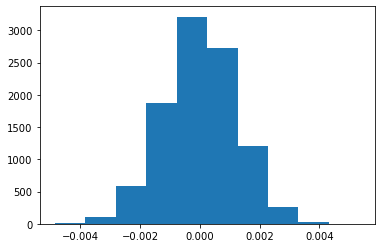

In [65]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [66]:
type(p_diffs)

list

In [68]:
np.mean(p_diffs)

1.7581492637229232e-06

In [72]:
act_new_converted = df.query('group == "treatment"')['converted'].mean()
act_old_converted = df.query('group == "control"')['converted'].mean()
act_diff = act_new_converted - act_old_converted

In [71]:
count=0
for i in p_diffs:
    if i> act_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.8893


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- act_diff is the difference between converted rates of new page and old page, based on our dataset, while p_diffs is the simulated difference based on 10000 samples by bootstrapping


- The p-value was calculated by computing the proportion of p_diffs that are greater than obs_diff observed in our dataset. The p-value determines the probability of obtaining our observed statistic

- p-value = 0.8880, the difference in the conversion rate for the control and treatment groups is not statistically significant. Since the p-value is far greater than the typical $\alpha$ level of 0.05. So, we would fail to reject the null hypothesis.

- to conclude, the difference between the old page and the new page is not statistically significant so we should stick with the old page


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old =df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print ('z_score = ',z_score)
print('p_value = ', p_value )

z_score =  -1.31092419842
p_value =  0.905058312759


In [39]:
from scipy.stats import norm

print(norm.cdf(z_score)) #significance of z_score
print(norm.ppf(1-(0.05/2))) #critical value at 95% confidence

0.094941687241
1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- Since the z-score is equal to -1.31092419842 and is less than the critical value of 1.95996398454. So, we fail to reject the null hypothesis.

- These values agree with the findings in parts j. and k 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept'] = 1
df2['ab_page']= pd.get_dummies(df['landing_page'])['new_page'] #use the 1 for new_page and treatment

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
import statsmodels.api as sm

Xtrain = df2[['intercept', 'ab_page']] 
ytrain = df2[['converted']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
log_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-16 16:01 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

H0: P_old = P_new 

H1: P_new > P_old

p-value = 0.1899
The p-values is different since we are performing a two-tailed test in Logistic Regression not a one-tailed test.
the p-value is equal to 0.190, is also greater than the  $\alpha$ level of 0.05.Therefore, we would fail to reject the null hypothesis in logistic regression also


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Advantages :
- Considering relevant factors to be added into our Logitic Regression Model, can prevent bias in the estimate of the other regression coefficient


Disadvantages :
- if we add high correlations predictor variables, leading to unreliable and unstable estimates of regression coefficients (Multicollinearity) can affect our model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
df_countries = pd.read_csv('./countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [44]:
df_new = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,duplicated_user,intercept,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1


In [45]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [46]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,duplicated_user,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,1,0


In [48]:
### Fit the Logistic Regression Model And Obtain the Results
df_new['intercept'] = 1

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA','UK', 'ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-16 16:02 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

- the p-values for Canada and UK are 0.1295 and 0.4573, respectively which is greater than a 0.05 $\alpha$ level.
  This results in that we fail to reject the Null Hypothesis.
- We can conclude no significant contribution from the country, where the user lives, to differences in conversion rates for the new and old pages.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
#creating the necessary additional columns
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_page'] = df_new['US'] * df_new['ab_page']

df_new.head()

,country,timestamp,group,landing_page,converted,duplicated_user,intercept,ab_page,CA,UK,US,CA_page,UK_page,US_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,1,0,0,1,0


In [52]:
df_new['intercept'] = 1

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA','UK', 'ab_page','CA_page','UK_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-16 16:04 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

- the p-values of the CA_page and UK_page are 0.3833 and 0.2377 which are greater than the significance level of 0.05 ($\alpha$ level). This means that we fail to reject the null hypothesis, there is no sufficient evidence that there is an interaction between country and page received that will predict whether a user converts or not.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0